# Coursework 1 - Articial Intelligence and Machine Learning
# Student Name: Rosemary Odinakachi
# Student Email: RNNAMD300@caledonian.ac.uk

I confirm that the material contained within the submitted coursework is all my own work unless otherwise stated below.

---


# Introduction and Problem Definition


The first step of the Machine Learning pipeline is the problem identification process. I used the dataset that was provided called bike dataset. (Fanaee-T and Gama, 2013). The demand for bike sharing rental is dependent on different factors such as weather conditions, day of the week, precipitation, season, hoour of the day, etc. In this study, we are analyzing the effects of weather conditions like atemp, temperature and humidity on the total number of bike rentals.

## **Module Imports**

In this stage, we are going to import all the modules that we need.

In [1]:
import numpy as np
import pandas as pd
import sklearn.model_selection
import sklearn.preprocessing  
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


# Data Ingestion

The data was given to us as part of the assignment, and it is called bike-dataset hour.csv. 
The first step is to import the file to Google Colab.

In [2]:
from google.colab import files
uploaded = files.upload()



Saving bike-dataset hour.csv to bike-dataset hour.csv


The next step is to read the data to see what I am dealing with.

In [3]:
#check the top part of the dataset
df = pd.read_csv("./bike-dataset hour.csv")
df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,No,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,No,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,No,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,No,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,No,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,No,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,No,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,No,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,No,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,No,1,0.32,0.3485,0.76,0.0000,8,6,14


In [4]:
#View the descriptive information to know the data info and data type.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  object 
 9   weathersit  17379 non-null  int64  
 10  temp        15595 non-null  float64
 11  atemp       15595 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11), object(2)
memory usage: 2.3+ MB


In [5]:
#I want to check the shape of the bike dataset such as the number of columns, also called features and columns called observations.
print(df.shape)

(17379, 17)


From this, I can see that the bike dataset has 17379 rows and 17 columns.

Instant and workingday are object.Temp, atemp, windspeed and casual are float and the rest are integers. 

In [6]:
#I want to check if there is any dupliates in the row.
df_dup = df.copy()

#If there is any duplicates, I want to drop them.

df_dup.drop_duplicates(subset=None, inplace=True)

The next stage is to compare if the shape or number of rows and columns in the original dataset and duplicated dataset are the same.

In [7]:
df_dup.shape

(17379, 17)

In [8]:
df.shape

(17379, 17)

This shows that there is no duplicates since the rows and columns in the original and copy are the same.

**Target Variable**

Count or Total number of users



**Categorical data**

Season

Year or yr

month (mnth)

Date Day (dteday)

holiday

hour or hr

weekday
workingday
weathers




**Numerical data**

Count 

instant (discrete)

registered (discrete)

temp (continous)

atemp (continous)

humidity (continous)

windspeed (continous)

casual (discrete)

registered (discrete)

count (discrete)



# Data Preparation

We will take the following steps in preparing the data.

1. Remove unnecessary columns
2. Handle missing values
3. Create Peak Time column
4. Create Night Time Column
5. Encode
6. Bin the count column


**3.1 Remove Unnecessary Columns**

We want to remove uncessary columns such as weekday, holiday, year, season, month, weathersit and windspeed.

I have removed season, weathersit and windspeed because their data are not necessary to my analysis.

In [9]:
df = df.drop(columns=['weekday', 'holiday', 'yr', 'season', 'mnth', 'weathersit',])
df.head(1)

,instant,dteday,hr,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,0,No,0.24,0.2879,0.81,0.0,3,13,16


**3.2 Handle missing values**

After looking at the data, atemp and temp columns have missing figures.

In [10]:
#Find all values where the atemp is NaN for checking whether your code is correct
df[df['atemp'].isna()]

,instant,dteday,hr,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
10,11,2011-01-01,10,No,NaN,NaN,0.76,0.2537,12,24,36
15,16,2011-01-01,15,No,NaN,NaN,0.77,0.2985,40,70,110
23,24,2011-01-01,23,No,NaN,NaN,0.88,0.2985,15,24,39
42,43,2011-01-02,19,No,NaN,NaN,0.42,0.4478,1,29,30
49,50,2011-01-03,4,Yes,NaN,NaN,0.47,0.3881,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
17327,17328,2012-12-29,20,No,NaN,NaN,0.56,0.5522,2,64,66
17333,17334,2012-12-30,2,No,NaN,NaN,0.56,0.2836,0,19,19
17339,17340,2012-12-30,8,No,NaN,NaN,0.52,0.4627,1,32,33
17350,17351,2012-12-30,19,No,NaN,NaN,0.61,0.0000,16,86,102


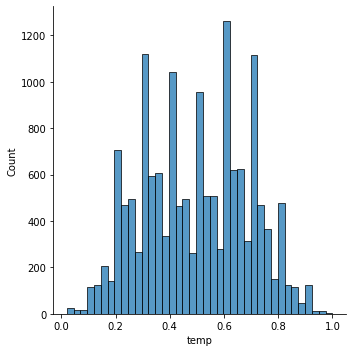

In [11]:
#I want to find the skewness of data for temp
import random
import seaborn as sns

#I have decided to plot the histogram to see the distribution of the point data.
sns.displot(df, x="temp")

In [12]:
df['temp'].agg(['skew', 'kurtosis']).transpose()

skew       -0.002997
kurtosis   -0.949133
Name: temp, dtype: float64

We can see that the following exists:

skew is -0.002997.

Skewness that is between -0.5 to 0.5, it means that the data is fairly symmetrical. This is why I want to use mean to find the missing value of temp.



In [13]:
#Find the mean atemp, then use the figure to fill the missing values. We did this because it is a numerical variable. I am assuming that it is unskewed, hence my decision to use mean instead of median.
df['atemp']=df['atemp'].fillna(df['atemp'].mean())
df.head(16)

,instant,dteday,hr,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,0,No,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,No,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,2,No,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,3,No,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,4,No,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,5,No,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,6,No,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,7,No,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,8,No,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,9,No,0.32,0.3485,0.76,0.0000,8,6,14


In [14]:
#Find the mean temperature, then use the figures to fill the missing values. We did this because it is a numerical variable and it is unskewed.
df['temp']=df['temp'].fillna(df['temp'].mean())
df.head(16)

,instant,dteday,hr,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,0,No,0.240000,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,No,0.220000,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,2,No,0.220000,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,3,No,0.240000,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,4,No,0.240000,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,5,No,0.240000,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,6,No,0.220000,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,7,No,0.200000,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,8,No,0.240000,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,9,No,0.320000,0.3485,0.76,0.0000,8,6,14


**3.3 Handle the workingday variable**


To do this, I want to use workingday column and transform it into numerical values.

Yes = 1

No = 2

In [15]:
df.loc[df['workingday'] == 'Yes', 'workingday'] = 1
df.loc[df['workingday'] == 'No', 'workingday'] = 2
df.head(100)


,instant,dteday,hr,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,0,2,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,2,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,2,2,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,3,2,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,4,2,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
95,96,2011-01-05,4,1,0.24,0.2273,0.48,0.2239,0,2,2
96,97,2011-01-05,5,1,0.22,0.2273,0.47,0.1642,0,3,3
97,98,2011-01-05,6,1,0.20,0.1970,0.47,0.2239,0,33,33
98,99,2011-01-05,7,1,0.18,0.1818,0.43,0.1940,1,87,88


**3.4 Create a Peak Time**

In [16]:
conditions = [((df['workingday']>=2) & (df['hr']>=10) & (df['hr']<=16)),
              ((df['workingday']<=1) & (df['hr']>=7) & (df['hr']<=9)),
              ((df['workingday']<=1) & (df['hr']>=16) & (df['hr']<=19))]

choices = ['1','1','1']
df['Peak'] = np.select(conditions,choices,default='0')
df.head(16)

,instant,dteday,hr,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,Peak
0,1,2011-01-01,0,2,0.240000,0.2879,0.81,0.0000,3,13,16,0
1,2,2011-01-01,1,2,0.220000,0.2727,0.80,0.0000,8,32,40,0
2,3,2011-01-01,2,2,0.220000,0.2727,0.80,0.0000,5,27,32,0
3,4,2011-01-01,3,2,0.240000,0.2879,0.75,0.0000,3,10,13,0
4,5,2011-01-01,4,2,0.240000,0.2879,0.75,0.0000,0,1,1,0
5,6,2011-01-01,5,2,0.240000,0.2576,0.75,0.0896,0,1,1,0
6,7,2011-01-01,6,2,0.220000,0.2727,0.80,0.0000,2,0,2,0
7,8,2011-01-01,7,2,0.200000,0.2576,0.86,0.0000,1,2,3,0
8,9,2011-01-01,8,2,0.240000,0.2879,0.75,0.0000,1,7,8,0
9,10,2011-01-01,9,2,0.320000,0.3485,0.76,0.0000,8,6,14,0


Peak time is represented by 1, while other times are represented by 0.

**3.5 Create a night time column**




In [17]:
def night (hr):
  if hr >= 22:
    return "1"

  if hr <= 4:
    return "1"

  elif 5 <= hr <= 21:
    return "2"  

df['night'] = df['hr'].map(night)
display(df.head(100))

,instant,dteday,hr,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,Peak,night
0,1,2011-01-01,0,2,0.24,0.2879,0.81,0.0000,3,13,16,0,1
1,2,2011-01-01,1,2,0.22,0.2727,0.80,0.0000,8,32,40,0,1
2,3,2011-01-01,2,2,0.22,0.2727,0.80,0.0000,5,27,32,0,1
3,4,2011-01-01,3,2,0.24,0.2879,0.75,0.0000,3,10,13,0,1
4,5,2011-01-01,4,2,0.24,0.2879,0.75,0.0000,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,2011-01-05,4,1,0.24,0.2273,0.48,0.2239,0,2,2,0,1
96,97,2011-01-05,5,1,0.22,0.2273,0.47,0.1642,0,3,3,0,2
97,98,2011-01-05,6,1,0.20,0.1970,0.47,0.2239,0,33,33,0,2
98,99,2011-01-05,7,1,0.18,0.1818,0.43,0.1940,1,87,88,1,2


Night is 1 and day is 2.

**3.6 Remove casual, registered, instant and dateday columns**

I dropped registered and casual as requested by the assessment guideline. I feel those columns are not necessary to this analysis since we are focusing on the total demand of bikes and not those that are registered members or casual users.

Dateday contains specific dates which I do not need for this analysis.

Instant column is merely the record index and is not necessary.


In [18]:
df = df.drop(columns=['registered', 'instant', 'casual', 'dteday'])
df.head(1)

,hr,workingday,temp,atemp,hum,windspeed,cnt,Peak,night
0,0,2,0.24,0.2879,0.81,0.0,16,0,1


Now, I want to check the correlation between the columns.


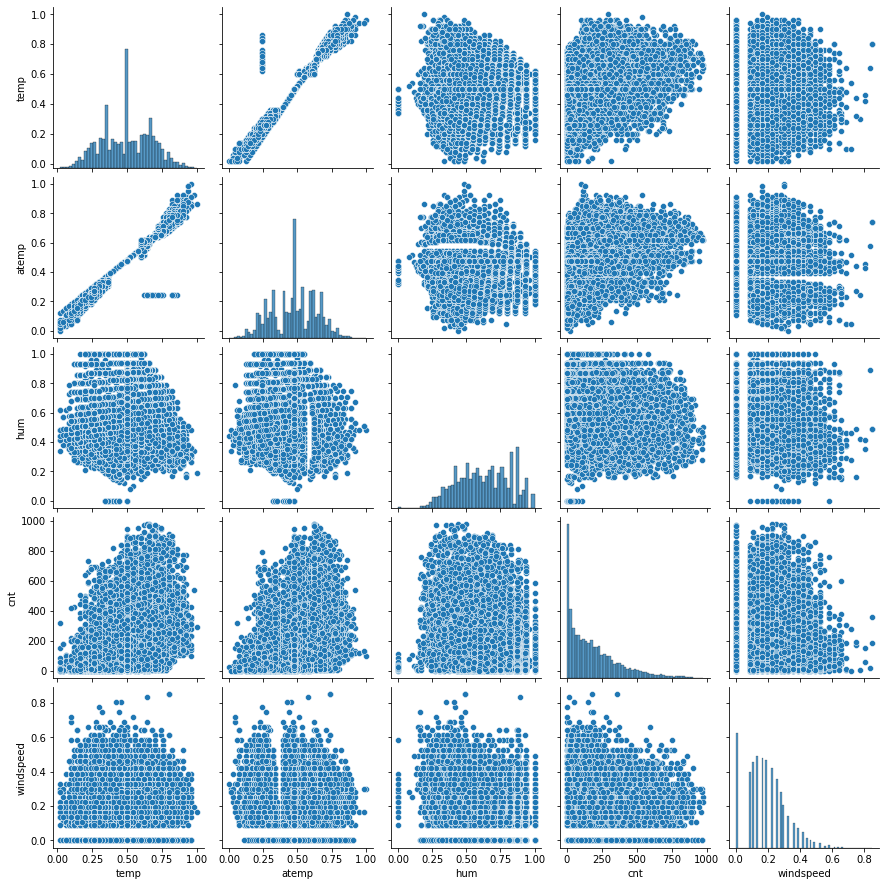

In [19]:
sns.pairplot(data=df,vars=['temp', 'atemp', 'hum', 'cnt', 'windspeed'])

plt.show()

I have noticed that atemp and tempare highly correlated. This means that I will have to drop atemp or temp to avoid multicollinearity.

In [20]:
df = df.drop(columns=['atemp'])
df.head(1)

,hr,workingday,temp,hum,windspeed,cnt,Peak,night
0,0,2,0.24,0.81,0.0,16,0,1


**3.7 Handle the count variable**

I have decided to bin the count variable because I want to easily spot those periods that the total count of bikes are low, middle or high. By binning, I am grouping ranges of total count of bikes into smaller classes or bins.






To do this, I want to use count column and create an ordinal value out of this with two bins:

Low Count 0<=50 

Medium Count 50<=100 

High Count > 100

,hr,workingday,temp,hum,windspeed,cnt,Peak,night
0,0,2,0.24,0.81,0.0,2,0,1
1,1,2,0.22,0.80,0.0,2,0,1
2,2,2,0.22,0.80,0.0,2,0,1
3,3,2,0.24,0.75,0.0,2,0,1
4,4,2,0.24,0.75,0.0,1,0,1


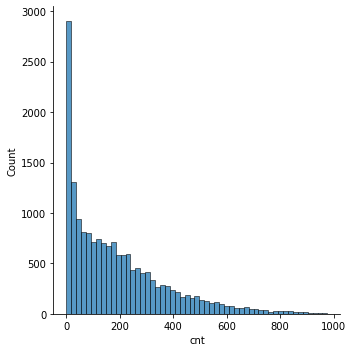

In [21]:
# Show the distribution of data in the count variable
sns.displot(df['cnt'])

# Replace the values in the *count* column based on three groups
df.loc[df['cnt'] <= 10, 'cnt'] = 1
df.loc[(df['cnt'] > 10) & (df['cnt'] <= 100), 'cnt'] = 2
df.loc[df['cnt'] > 100, 'cnt'] = 3

df.head()

This means that 1 is low, which is 0 to 50.

2 is medium, whiis 51 to 100.

3 is for highest, which is 101 and above.

**3.8 Encoding of the data**

This is the last stage of the data preparation.

The column I encoded is the working day column, and i did it in 3.3. I did label encoding, where I assigned 

Yes = 1

No = 2

# 4. Data Segregation

Now that I have cleaned or prepared the data, the next step is to segregate them into train/test. I will utilize the training set to develop the model and train it. As for the test set, I will use it to check the model's performance. I will split the dataset into 80/20 for train and test.

To do this, I decided to split the first 80 percent, and save them into a dataframe variable that I called train_df. I then decided to save the second section, which is 20% in a variable test_df.

I have also decided to print out the first 10 lines of each subset.


In [22]:
# I have split the dataset into 80% train and 20% test.
train_df = df[:int(0.8*df.shape[0])]
test_df = df[int(0.8*df.shape[0]):]

print(train_df.head(10))
print(test_df.head(10))



   hr workingday  temp   hum  windspeed  cnt Peak night
0   0          2  0.24  0.81     0.0000    2    0     1
1   1          2  0.22  0.80     0.0000    2    0     1
2   2          2  0.22  0.80     0.0000    2    0     1
3   3          2  0.24  0.75     0.0000    2    0     1
4   4          2  0.24  0.75     0.0000    1    0     1
5   5          2  0.24  0.75     0.0896    1    0     2
6   6          2  0.22  0.80     0.0000    1    0     2
7   7          2  0.20  0.86     0.0000    1    0     2
8   8          2  0.24  0.75     0.0000    1    0     2
9   9          2  0.32  0.76     0.0000    2    0     2
       hr workingday      temp   hum  windspeed  cnt Peak night
13903  12          1  0.800000  0.55     0.1343    3    0     2
13904  13          1  0.496451  0.52     0.1940    3    0     2
13905  14          1  0.820000  0.46     0.0000    3    0     2
13906  15          1  0.800000  0.52     0.0000    3    0     2
13907  16          1  0.760000  0.66     0.2836    3    1     2


To avoid bias in the training data and test datasets, I have decided to use random sampling. To do this, I will randomly shuffle the data before I extract the train and test data sets.

In [23]:
 # I have decided to set the numpy random seed to 42
 np.random.seed(42)

 # The next stage is to shuffle the dataframe or df
df = df.sample(frac=1).reset_index(drop=True)
print(df.head())


train_df = df[:int(0.8*df.shape[0])]
test_df = df[int(0.8*df.shape[0]):]

print(train_df.head(10))
print(test_df.head(10))

   hr workingday      temp   hum  windspeed  cnt Peak night
0  19          2  0.800000  0.27     0.1940    3    0     2
1  20          2  0.496451  0.41     0.2239    2    0     2
2   2          1  0.320000  0.66     0.2836    1    0     1
3  19          1  0.780000  0.52     0.3582    3    1     2
4   0          1  0.260000  0.56     0.3881    2    0     1
   hr workingday      temp   hum  windspeed  cnt Peak night
0  19          2  0.800000  0.27     0.1940    3    0     2
1  20          2  0.496451  0.41     0.2239    2    0     2
2   2          1  0.320000  0.66     0.2836    1    0     1
3  19          1  0.780000  0.52     0.3582    3    1     2
4   0          1  0.260000  0.56     0.3881    2    0     1
5   0          1  0.440000  0.72     0.2836    2    0     1
6  18          1  0.720000  0.58     0.1343    3    1     2
7   7          2  0.260000  0.87     0.0000    2    0     2
8   2          1  0.500000  0.68     0.1940    1    0     1
9   5          1  0.420000  0.71     0.2

 At this stage, we will extract the target variable *count* from the dataframes. After doing this, we have decided to save it in a new dataframe *y_train* and *y_test* respectively.

 The second thing to do is drop the count column from the train and test dataframes. After that, we will save the remaining dataframes in the variables X_train and X_test

In [24]:
y_train = train_df['cnt']
y_test = test_df['cnt']
X_train = train_df.drop(columns=['cnt'])
X_test = test_df.drop(columns=['cnt'])


In [25]:
# I am extracting the features and labels as above and same them  in variables X and y
X = df.drop(columns=['cnt'])
y = df['cnt']
# I am shuffling and extracting an 80/20 split of the data in the dataframe df using sklearn.model_selection.train_test_split
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)
# I want to print out the top few lines of each dataframe to check that the split was correct
print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())

      hr workingday      temp   hum  windspeed Peak night
335   23          1  0.496451  0.35     0.2239    0     1
7035   3          1  0.496451  0.87     0.2836    0     1
8051   7          1  0.440000  0.88     0.2537    1     2
2133   3          2  0.560000  0.60     0.0896    0     1
8485   0          2  0.660000  0.78     0.1940    0     1
       hr workingday  temp   hum  windspeed Peak night
12830   6          1  0.62  0.78     0.1642    0     2
8688    0          1  0.70  0.79     0.1940    0     1
7091   14          1  0.32  0.45     0.2537    0     2
12230  11          2  0.16  0.55     0.1940    1     2
431     1          1  0.52  0.63     0.0896    0     1
335     3
7035    1
8051    3
2133    2
8485    3
Name: cnt, dtype: int64
12830    2
8688     2
7091     3
12230    2
431      2
Name: cnt, dtype: int64


#5. Model Training

I have decided to import sklearn.

In [26]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor # for building the model
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn import metrics

I have decided to select a classification algorithm such as Polynomial Regression and RandomForest.



Polynomial Regression is an algorithm that is designed to model the relationship that exists between multiple variables such as x and y as the nth degree polynomial.


I am using polynomial regression because it can fit a broad range of curvatures and functions. I also want to see the relationship that exists between indepedent and dependent variables. It is much more accurate than using linear regression.



This is a regression algorithm that is design to create multiple decision trees during training. It usees ensemmble learning method, which merges predictions from more than one ML algorithms. This is one of the reasons that it is accurate.
I am using this because I want a more accurate result.





I have decided to implement a grid search through the usage of scikit learns GridSearchCV method by selecting a range of suitable hyperparameters and use the X_train, y_train variables of this notebook for training. This is done to optimize the model.


**Linear Regression**

In [27]:
#import Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linearRegressor = LinearRegression()

#fit the model
linearRegressor.fit(X_train, y_train)
y_predicted = linearRegressor.predict(X_test)
mse = mean_squared_error(y_test, y_predicted)
r = r2_score(y_test, y_predicted)
mae = mean_absolute_error(y_test,y_predicted)
print("Mean Squared Error:",mse)
print("R score:",r)
print("Mean Absolute Error:",mae)

Mean Squared Error: 0.2058285868797846
R score: 0.5729262042593017
Mean Absolute Error: 0.36930416596027316


**Polynomial Regression**

In [28]:
# import the regressor
from sklearn.preprocessing import PolynomialFeatures

#I want to set up the data
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X_train)
x_poly_test = polynomial_features.fit_transform(X_test)

#I am building the model
model = LinearRegression()

#Fit the model
model.fit(x_poly, y_train)
y_predicted_p = model.predict(x_poly_test)
mse = mean_squared_error(y_test, y_predicted_p)
rmse = mse**.5
r = r2_score(y_test, y_predicted_p)
mae = mean_absolute_error(y_test,y_predicted_p)

#print the result
print("Mean Squared Error:",mse)
print(" Root Mean Squared Error:",rmse)
print("R score:",r)
print("Mean Absolute Error:",mae)

Mean Squared Error: 0.16199056760509517
 Root Mean Squared Error: 0.40248051829261894
R score: 0.663885723406806
Mean Absolute Error: 0.29959052431460886


R-squared is used to measure relationship, and it usually spans from 0 to 1. By 0, it means that there is no relationship, while 1 means that they are 100% related to each other. The r score is above 0.5, meaning that there is 65% relationship.

Mean squared error or MSE is meant to calculate the average of the addition of the squared differences that exist between actual and predicted. I want to clamp down or reduce the value of mean squared error. The mean squared error here is 0.16199056760509517.
Lets see if we can go lower after tuning the parameters in the later section.

Root Mean Squared is merely the square root of MSE. This represents the standard deviation of the prediction errors or residuals. I am using this to see the level of concentration od the data close to the line of best fit.
Typically, the lower the RSME level of a model, the better it can fit a dataset.

Mean Absolute Error measures errors that exist between observations. It is typically the average of every absolute error. The lower the value of a mean absolute error, the better the model. This is because it is a negatively oriented score.

This is our baseline model:
Mean Squared Error: 0.16199056760509517
Root Mean Squared Error: 0.40248051829261894
R score: 0.663885723406806
Mean Absolute Error: 0.29959052431460886



**Random Forest**

In [29]:
# import Random Forest regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

#fit the model
rf.fit(X_train,y_train);
y_predicted_r = rf.predict(X_test)

#find mean squared error, r score and mean absolute error
mse = mean_squared_error(y_test, y_predicted_r)
rmse = mse**.5
r = r2_score(y_test, y_predicted_r)
mae = mean_absolute_error(y_test,y_predicted_r)
print("Mean Squared Error:",mse)
print("Root Mean Squared Error:",rmse)
print("R score:",r)
print("Mean Absolute Error:",mae)

Mean Squared Error: 0.10149987172572568
Root Mean Squared Error: 0.3185904451262242
R score: 0.7893978861623471
Mean Absolute Error: 0.18243260247136828


The above explanation of the metrics also apply here.
Meanwhile, the baseline of this model are below:
Mean Squared Error: 0.1013153400691884

Root Mean Squared Error: 0.3183007069882007

R score: 0.7897807709510267

Mean Absolute Error: 0.1829319140774837

#Decision Tree

In [30]:
# import Decision Tree
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state = 0)

#fit the model
regressor.fit(X_train, y_train)
y_predicted_d = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_predicted_d)
rmse = mse**.5
r = r2_score(y_test, y_predicted_d)
mae = mean_absolute_error(y_test,y_predicted_d)
print("Mean Squared Error:",mse)
print(" Root Mean Squared Error:",rmse)
print("R score:",r)
print("Mean Absolute Error:",mae)

Mean Squared Error: 0.17163725866257512
 Root Mean Squared Error: 0.4142912727328143
R score: 0.643869801280974
Mean Absolute Error: 0.17328346758726504


The baseline of this model are:

Mean Squared Error: 0.17163725866257512

Root Mean Squared Error: 0.4142912727328143

R score: 0.643869801280974

Mean Absolute Error: 0.17328346758726504


**5.2 Hyperparameter Optimization**

**Random Forest**

I want to look for better performing choice of parameters with the help of the GridSearchCV sklearn method.

In [31]:
tuned_parameters =[{"n_estimators": [10, 50, 100], "max_depth": [2, 4, 6, 10], "max_features": ["sqrt", "log2"]}]

model = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    model, tuned_parameters, scoring="accuracy",cv=5)
grid_search.fit(X_train, y_train)


print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 2, 'max_features': 'sqrt', 'n_estimators': 10}


**Polynomial Regression**

In [32]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import LeaveOneOut, KFold

In [33]:
# I want to define a method to sample random data

def make_data(N, err=1.0, rseed=1):

    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 1. / (X.ravel() + 0.3)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

# I am building a pipeline
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

# I am creating a data and a vector(X_test) for testing and visualisation purposes:
X, y = make_data(200)
X_test = np.linspace(-0.1, 1.1, 200)[:, None]

param_grid = {'polynomialfeatures__degree': np.arange(20),
'linearregression__fit_intercept': [True, False],
'linearregression__normalize': [True, False]}
grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)
grid.fit(X, y)

# This is to give the best parameters from our model
model = grid.best_estimator_

y_test = model.fit(X, y).predict(X_test)


**6.0 Model Evaluation**

Polynomial Regression

In [34]:
# import the regressor
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X.reshape(-1,1))

poly_reg_model = LinearRegression()

#Fit the model to our data
poly_reg_model.fit(poly_features, y)
y_predicted = poly_reg_model.predict(poly_features)
mse = mean_squared_error(y, y_predicted)
rmse = mse**.5
r = r2_score(y, y_predicted)
mae = mean_absolute_error(y,y_predicted)
print("Mean Squared Error:",mse)
print("Root Mean Squared Error:",rmse)
print("R score:",r)
print("Mean Absolute Error:",mae)

Mean Squared Error: 1.0188107405710023
Root Mean Squared Error: 1.009361550967245
R score: 0.4745174029691077
Mean Absolute Error: 0.7935376380945054


This is our baseline model for Polynomial:

Mean Squared Error: 0.16199056760509517

Root Mean Squared Error: 0.40248051829261894

R score: 0.663885723406806

Mean Absolute Error: 0.29959052431460886


This is the optimized version after adding hyperparameters

Mean Squared Error: 1.0188107405710023

Root Mean Squared Error: 1.009361550967245

R score: 0.4745174029691077

Mean Absolute Error: 0.7935376380945054

The aim of using hyperparameters is to optimize the baseline model to work effectively, and I doubt if it worked in this case because the RMSE, MSe, and MAE increased instead of reducing. The hyperparameters need to be tweaked further.

Random Forest Regressor

In [36]:
# Data split on df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state=42)

# Apply RandomForestRegressor
model = RandomForestRegressor(n_estimators=300, max_depth=13, random_state=0)
model.fit(X_train,y_train)

regressor.fit(X_train, y_train)
y_predicted_d = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_predicted_d)
r = r2_score(y_test, y_predicted_d)
mae = mean_absolute_error(y_test,y_predicted_d)
print("Mean Squared Error:",mse)
print("R score:",r)
print("Mean Absolute Error:",mae)

# Predicting the data using the model
y_pred = model.predict(X_test)

# Evaluating the model 
print(metrics.r2_score(y_test,y_pred))


Mean Squared Error: 1.7998828752127736
R score: -0.08004377310634259
Mean Absolute Error: 1.1264030686385471
0.3263449953229639


Meanwhile, the baseline of this model are below:
Mean Squared Error: 0.1013153400691884

Root Mean Squared Error: 0.3183007069882007

R score: 0.7897807709510267

Mean Absolute Error: 0.1829319140774837

The new model gave:

Mean Squared Error: 1.7998828752127736

R score: -0.08004377310634259

Mean Absolute Error: 1.1264030686385471

The same thing occurred here.

From the baseline models above, we can deduce that RandomForest is the best for this dataset. This is because the lesser the Mean Squared Error, the smaller the error, which translates to a better estimator.

RandomForest has the lowest Mean Squared error out of the rest.

Based on the r score, which I am using to evaluate the performance of the linear regression model, I can state that RandomForest is better than the rest. Since it is higher, meaning that it offers well-observed results than its counterparts.

# Conclusion

From the baseline models above, we can deduce that RandomForest is the best for this dataset. This is because the lesser the Mean Squared Error, the smaller the error, which translates to a better estimator.

RandomForest has the lowest Mean Squared error out of the rest.

Based on the r score, which I am using to evaluate the performance of the linear regression model, I can state that RandomForest is better than the rest. Since it is higher, meaning that it offers well-observed results than its counterparts.

My hyperparameters increased the negatively oriented scores instead of reducing them.

# References
 Fanaee-T, H. and Gama, J. (2013) "Event labeling combining ensemble detectors and background knowledge", Progress in Artificial Intelligence, pp. 1-15. doi:10.1007/s13748-013-0040-3.

Data Quest (2020) Tutorial: Add a Column to a Pandas Dataframe Based on an If-Else Condition. Available at:
https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/
(Accessed 23 November 2022)

FolksTalk (no date) Skewness Python With Code Examples. Available at:
https://www.folkstalk.com/2022/10/skewness-python-with-code-examples.html (Accessed: 26 November 2022).

Geeks For Geeks (2022) Create a new column in Pandas Dataframe based on the existing columns. Available at:
https://www.geeksforgeeks.org/create-a-new-column-in-pandas-dataframe-based-on-the-existing-columns/ (Accessed: 30 November 2022).

Harmadi, A. (20210 10 Things to do when conducting your Exploratory Data Analysis (EDA). Avaialble at: 
https://medium.com/data-folks-indonesia/10-things-to-do-when-conducting-your-exploratory-data-analysis-eda-7e3b2dfbf812
(Accessed: 25b November 2022).

Kumar, A. (2021) Python - Replace Missing Values with Mean, Median & Mode. Avaialble at: 
https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/ (Accessed: 24 November 2022).

Random Forest Regression
https://towardsdatascience.com/random-forest-regression-5f605132d19d

Regression Models
https://namanbansal9909.medium.com/regression-techniques-on-a-bike-sharing-dataset-d88e29d9e592

Simplilearn (2022) Mean Squared Error: Overview, Examples, Concepts and More. Available at:
https://www.simplilearn.com/tutorials/statistics-tutorial/mean-squared-error
(Accessed: 20 November 2022).

Stack Overflow
https://stackoverflow.com/questions/47442102/how-to-find-the-best-degree-of-polynomials

Tutorials Point (no date) Python - How to fill NAN values with mean in Pandas? Available at:
https://www.tutorialspoint.com/python-how-to-fill-nan-values-with-mean-in-pandas
(Accessed: 18 November 2022).

 
 